In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt_kwargs = {'figsize': (10, 4)}

In [52]:
eco_rounds = pd.read_csv("../../data/vct_2022/matches/eco_rounds.csv")
#maps_scores = pd.read_csv("../../data/vct_2022/matches/maps_scores.csv")
#eco_stats = pd.read_csv("../../data/vct_2022/matches/eco_stats.csv")

In [53]:
eco_rounds = eco_rounds.loc[ (eco_rounds["Map"]=="Haven")]
eco_rounds["Outcome"] = eco_rounds["Outcome"].apply(lambda x: 1 if x == "Win" else 0)
eco_rounds["Loadout Value"] = eco_rounds["Loadout Value"].apply(lambda x: int(x.replace(".","").replace("k","00")))
eco_rounds["Remaining Credits"] = eco_rounds["Remaining Credits"].apply(lambda x: int(x.replace(".","").replace("k","00")))

eco_rounds

,Tournament,Stage,Match Type,Match Name,Map,Round Number,Team,Loadout Value,Remaining Credits,Type,Outcome
84,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Haven,1,Paper Rex,3900,300,Eco: 0-5k,1
85,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Haven,1,EDward Gaming,3700,300,Eco: 0-5k,0
86,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Haven,2,Paper Rex,14900,900,Semi-buy: 10-20k,1
87,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Haven,2,EDward Gaming,4800,9700,Eco: 0-5k,0
88,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Haven,3,Paper Rex,18800,8100,Semi-buy: 10-20k,0
...,...,...,...,...,...,...,...,...,...,...,...
358761,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Grand Final,Natus Vincere vs FunPlus Phoenix,Haven,18,FunPlus Phoenix,21200,3700,Full buy: 20k+,1
358762,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Grand Final,Natus Vincere vs FunPlus Phoenix,Haven,19,Natus Vincere,18300,2800,Semi-buy: 10-20k,1
358763,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Grand Final,Natus Vincere vs FunPlus Phoenix,Haven,19,FunPlus Phoenix,23100,5400,Full buy: 20k+,0
358764,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Grand Final,Natus Vincere vs FunPlus Phoenix,Haven,20,Natus Vincere,22200,12900,Full buy: 20k+,0


In [54]:
maps_scores = pd.read_csv("../../data/vct_2022/matches/maps_scores.csv")
maps_scores.head()

,Tournament,Stage,Match Type,Match Name,Map,Team A,Team A Score,Team A Attacker Score,Team A Defender Score,Team A Overtime Score,Team B,Team B Score,Team B Attacker Score,Team B Defender Score,Team B Overtime Score,Duration
0,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,Paper Rex,13,6,7,NaN,EDward Gaming,11,5,6,NaN,1:16:34
1,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Icebox,Paper Rex,5,2,3,NaN,EDward Gaming,13,3,10,NaN,40:51
2,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Haven,Paper Rex,13,7,6,NaN,EDward Gaming,8,3,5,NaN,NaN
3,Valorant Champions 2022,Group Stage,Opening (A),Leviatán vs Team Liquid,Haven,Leviatán,13,8,5,NaN,Team Liquid,10,6,4,NaN,1:04:37
4,Valorant Champions 2022,Group Stage,Opening (A),Leviatán vs Team Liquid,Ascent,Leviatán,13,6,7,NaN,Team Liquid,10,4,6,NaN,1:05:07


In [55]:
team_ab_2022 = maps_scores[["Tournament", "Stage", "Match Type", "Match Name", "Map", "Team A", "Team B"]]

team_ab_2022

,Tournament,Stage,Match Type,Match Name,Map,Team A,Team B
0,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,Paper Rex,EDward Gaming
1,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Icebox,Paper Rex,EDward Gaming
2,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Haven,Paper Rex,EDward Gaming
3,Valorant Champions 2022,Group Stage,Opening (A),Leviatán vs Team Liquid,Haven,Leviatán,Team Liquid
4,Valorant Champions 2022,Group Stage,Opening (A),Leviatán vs Team Liquid,Ascent,Leviatán,Team Liquid
...,...,...,...,...,...,...,...
8879,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Grand Final,Natus Vincere vs FunPlus Phoenix,Bind,Natus Vincere,FunPlus Phoenix
8880,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Grand Final,Natus Vincere vs FunPlus Phoenix,Icebox,Natus Vincere,FunPlus Phoenix
8881,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Grand Final,Natus Vincere vs FunPlus Phoenix,Breeze,Natus Vincere,FunPlus Phoenix
8882,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Grand Final,Natus Vincere vs FunPlus Phoenix,Haven,Natus Vincere,FunPlus Phoenix


In [56]:
keys = ['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map','Team']

Eco_rounds_ab_2022=\
pd.merge(
    team_ab_2022.rename(columns={"Team A":"Team"})\
    ,eco_rounds\
    ,on=keys
)\
.rename(columns={"Loadout Value":"Loadout_A", "Remaining Credits":"Remaining_credit_A", "Type":"Eco_type_A", "Outcome":"Outcome_A"})\
.rename(columns={"Team":"Team A", "Team B":"Team"})\
.set_index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map','Team', 'Round Number'])\
.join(eco_rounds\
      .set_index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map','Team', 'Round Number'])\
)\
.reset_index()\
.rename(columns={"Loadout Value":"Loadout_B", "Remaining Credits":"Remaining_credit_B", "Type":"Eco_type_B", "Outcome":"Outcome_B"})\
.rename(columns={"Team":"Team B"})

Eco_rounds_ab_2022.head()

,Tournament,Stage,Match Type,Match Name,Map,Team B,Round Number,Team A,Loadout_A,Remaining_credit_A,Eco_type_A,Outcome_A,Loadout_B,Remaining_credit_B,Eco_type_B,Outcome_B
0,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (B),Persija Esports vs Bonkers,Haven,Bonkers,1,Persija Esports,3800,200,Eco: 0-5k,0,3700,100,Eco: 0-5k,1
1,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (B),Persija Esports vs Bonkers,Haven,Bonkers,2,Persija Esports,1300,9700,Eco: 0-5k,0,16300,2400,Semi-buy: 10-20k,1
2,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (B),Persija Esports vs Bonkers,Haven,Bonkers,3,Persija Esports,21600,0,Full buy: 20k+,1,17100,17000,Semi-buy: 10-20k,0
3,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (B),Persija Esports vs Bonkers,Haven,Bonkers,4,Persija Esports,18300,6100,Semi-buy: 10-20k,0,20200,8400,Full buy: 20k+,1
4,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (B),Persija Esports vs Bonkers,Haven,Bonkers,5,Persija Esports,9000,11400,Semi-eco: 5-10k,0,23300,11900,Full buy: 20k+,1


In [57]:
Eco_rounds_ab_2022[[ "Eco_type_A", "Eco_type_B", "Outcome_A", "Round Number"]].groupby([ "Eco_type_A", "Eco_type_B", "Outcome_A"]).count()

Round Number
Eco_type_A       Eco_type_B       Outcome_A              
Eco: 0-5k        Eco: 0-5k        0                  1536
                                  1                  1843
                 Full buy: 20k+   0                   124
                                  1                    16
                 Semi-buy: 10-20k 0                  1200
                                  1                   130
                 Semi-eco: 5-10k  0                     1
Full buy: 20k+   Eco: 0-5k        0                    16
                                  1                   133
                 Full buy: 20k+   0                  5801
                                  1                  6578
                 Semi-buy: 10-20k 0                  1587
                                  1                  3026
                 Semi-eco: 5-10k  0                   376
                                  1                  1935
Semi-buy: 10-20k Eco: 0-5k        0                   104
                                  1                  1488
                 Full buy: 20k+   0                  2495
                                  1                  1693
                 Semi-buy: 10-20k 0                   511
                                  1                   598
                 Semi-eco: 5-10k  0                    51
                                  1                   235
Semi-eco: 5-10k  Eco: 0-5k        0                     1
                 Full buy: 20k+   0                  1503
                                  1                   385
                 Semi-buy: 10-20k 0                   188
                                  1                    54

In [58]:
def RoundRating(LoadOutA, LoadoutB,  OutcomeA):
    LoadoutB = max(LoadoutB, 100)
    LoadOutA = max(LoadOutA, 100)
    if OutcomeA == 1:
        return LoadoutB/LoadOutA
    if OutcomeA == 0:
        return 0
    
def RoundRating2(x, y):
    return 5

In [59]:
Eco_rounds_ab_2022["Rating_A"]=Eco_rounds_ab_2022[["Loadout_A", "Loadout_B", "Outcome_A"]]\
    .apply(lambda row: RoundRating(row["Loadout_A"], row["Loadout_B"], row["Outcome_A"]), axis=1)

Eco_rounds_ab_2022["Rating_B"]=Eco_rounds_ab_2022[["Loadout_A", "Loadout_B", "Outcome_B"]]\
    .apply(lambda row: RoundRating(row["Loadout_B"], row["Loadout_A"], row["Outcome_B"]), axis=1)


Eco_rounds_ab_2022.head(10)

,Tournament,Stage,Match Type,Match Name,Map,Team B,Round Number,Team A,Loadout_A,Remaining_credit_A,Eco_type_A,Outcome_A,Loadout_B,Remaining_credit_B,Eco_type_B,Outcome_B,Rating_A,Rating_B
0,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (B),Persija Esports vs Bonkers,Haven,Bonkers,1,Persija Esports,3800,200,Eco: 0-5k,0,3700,100,Eco: 0-5k,1,0.000000,1.027027
1,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (B),Persija Esports vs Bonkers,Haven,Bonkers,2,Persija Esports,1300,9700,Eco: 0-5k,0,16300,2400,Semi-buy: 10-20k,1,0.000000,0.079755
2,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (B),Persija Esports vs Bonkers,Haven,Bonkers,3,Persija Esports,21600,0,Full buy: 20k+,1,17100,17000,Semi-buy: 10-20k,0,0.791667,0.000000
3,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (B),Persija Esports vs Bonkers,Haven,Bonkers,4,Persija Esports,18300,6100,Semi-buy: 10-20k,0,20200,8400,Full buy: 20k+,1,0.000000,0.905941
4,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (B),Persija Esports vs Bonkers,Haven,Bonkers,5,Persija Esports,9000,11400,Semi-eco: 5-10k,0,23300,11900,Full buy: 20k+,1,0.000000,0.386266
5,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (B),Persija Esports vs Bonkers,Haven,Bonkers,6,Persija Esports,23500,800,Full buy: 20k+,1,23300,13300,Full buy: 20k+,0,0.991489,0.000000
6,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (B),Persija Esports vs Bonkers,Haven,Bonkers,7,Persija Esports,22300,3400,Full buy: 20k+,0,22900,2500,Full buy: 20k+,1,0.000000,0.973799
7,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (B),Persija Esports vs Bonkers,Haven,Bonkers,8,Persija Esports,22200,3700,Full buy: 20k+,1,24300,13600,Full buy: 20k+,0,1.094595,0.000000
8,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (B),Persija Esports vs Bonkers,Haven,Bonkers,9,Persija Esports,23300,3700,Full buy: 20k+,1,24000,3200,Full buy: 20k+,0,1.030043,0.000000
9,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (B),Persija Esports vs Bonkers,Haven,Bonkers,10,Persija Esports,23700,6000,Full buy: 20k+,1,23900,6800,Full buy: 20k+,0,1.008439,0.000000


In [60]:
keys = ['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map','Team A', 'Team B']
grouped5 = Eco_rounds_ab_2022.groupby(keys)
Eco_rounds_ab_2022["Match Rating A"]=grouped5["Rating_A"].transform(lambda x: x.mean())
Eco_rounds_ab_2022["Match Rating B"]=grouped5["Rating_B"].transform(lambda x: x.mean())

Eco_rounds_ab_2022.head(5)

,Tournament,Stage,Match Type,Match Name,Map,Team B,Round Number,Team A,Loadout_A,Remaining_credit_A,Eco_type_A,Outcome_A,Loadout_B,Remaining_credit_B,Eco_type_B,Outcome_B,Rating_A,Rating_B,Match Rating A,Match Rating B
0,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (B),Persija Esports vs Bonkers,Haven,Bonkers,1,Persija Esports,3800,200,Eco: 0-5k,0,3700,100,Eco: 0-5k,1,0.000000,1.027027,0.497852,0.365217
1,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (B),Persija Esports vs Bonkers,Haven,Bonkers,2,Persija Esports,1300,9700,Eco: 0-5k,0,16300,2400,Semi-buy: 10-20k,1,0.000000,0.079755,0.497852,0.365217
2,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (B),Persija Esports vs Bonkers,Haven,Bonkers,3,Persija Esports,21600,0,Full buy: 20k+,1,17100,17000,Semi-buy: 10-20k,0,0.791667,0.000000,0.497852,0.365217
3,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (B),Persija Esports vs Bonkers,Haven,Bonkers,4,Persija Esports,18300,6100,Semi-buy: 10-20k,0,20200,8400,Full buy: 20k+,1,0.000000,0.905941,0.497852,0.365217
4,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (B),Persija Esports vs Bonkers,Haven,Bonkers,5,Persija Esports,9000,11400,Semi-eco: 5-10k,0,23300,11900,Full buy: 20k+,1,0.000000,0.386266,0.497852,0.365217


In [61]:
#keys = ['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map','Team A', 'Team B']
grouped6 = Eco_rounds_ab_2022.groupby(["Team A"])
Eco_rounds_ab_2022["Team Rating A"]=grouped6["Rating_A"].transform(lambda x: x.mean())
grouped6 = Eco_rounds_ab_2022.groupby(["Team B"])
Eco_rounds_ab_2022["Team Rating B"]=grouped6["Rating_B"].transform(lambda x: x.mean())

Eco_rounds_ab_2022

,Tournament,Stage,Match Type,Match Name,Map,Team B,Round Number,Team A,Loadout_A,Remaining_credit_A,...,Loadout_B,Remaining_credit_B,Eco_type_B,Outcome_B,Rating_A,Rating_B,Match Rating A,Match Rating B,Team Rating A,Team Rating B
0,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (B),Persija Esports vs Bonkers,Haven,Bonkers,1,Persija Esports,3800,200,...,3700,100,Eco: 0-5k,1,0.000000,1.027027,0.497852,0.365217,0.435928,0.492422
1,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (B),Persija Esports vs Bonkers,Haven,Bonkers,2,Persija Esports,1300,9700,...,16300,2400,Semi-buy: 10-20k,1,0.000000,0.079755,0.497852,0.365217,0.435928,0.492422
2,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (B),Persija Esports vs Bonkers,Haven,Bonkers,3,Persija Esports,21600,0,...,17100,17000,Semi-buy: 10-20k,0,0.791667,0.000000,0.497852,0.365217,0.435928,0.492422
3,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (B),Persija Esports vs Bonkers,Haven,Bonkers,4,Persija Esports,18300,6100,...,20200,8400,Full buy: 20k+,1,0.000000,0.905941,0.497852,0.365217,0.435928,0.492422
4,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (B),Persija Esports vs Bonkers,Haven,Bonkers,5,Persija Esports,9000,11400,...,23300,11900,Full buy: 20k+,1,0.000000,0.386266,0.497852,0.365217,0.435928,0.492422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33603,Valorant Conquerors Championship,Wildcard Qualifier,Upper Bracket Round 1,M1syl and friends vs Salt Esports,Haven,Salt Esports,20,M1syl and friends,22400,7500,...,6300,10800,Semi-eco: 5-10k,0,0.281250,0.000000,0.461971,0.403826,0.516755,0.558981
33604,Valorant Conquerors Championship,Wildcard Qualifier,Upper Bracket Round 1,M1syl and friends vs Salt Esports,Haven,Salt Esports,21,M1syl and friends,23000,15500,...,21400,2600,Full buy: 20k+,1,0.000000,1.074766,0.461971,0.403826,0.516755,0.558981
33605,Valorant Conquerors Championship,Wildcard Qualifier,Upper Bracket Round 1,M1syl and friends vs Salt Esports,Haven,Salt Esports,22,M1syl and friends,22600,7300,...,22300,9700,Full buy: 20k+,1,0.000000,1.013453,0.461971,0.403826,0.516755,0.558981
33606,Valorant Conquerors Championship,Wildcard Qualifier,Upper Bracket Round 1,M1syl and friends vs Salt Esports,Haven,Salt Esports,23,M1syl and friends,12400,10800,...,22100,9100,Full buy: 20k+,1,0.000000,0.561086,0.461971,0.403826,0.516755,0.558981


In [62]:
Eco_rounds_ab_2022[['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map','Team A', 'Team B', 'Team Rating A', 'Team Rating B']]

,Tournament,Stage,Match Type,Match Name,Map,Team A,Team B,Team Rating A,Team Rating B
0,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (B),Persija Esports vs Bonkers,Haven,Persija Esports,Bonkers,0.435928,0.492422
1,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (B),Persija Esports vs Bonkers,Haven,Persija Esports,Bonkers,0.435928,0.492422
2,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (B),Persija Esports vs Bonkers,Haven,Persija Esports,Bonkers,0.435928,0.492422
3,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (B),Persija Esports vs Bonkers,Haven,Persija Esports,Bonkers,0.435928,0.492422
4,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (B),Persija Esports vs Bonkers,Haven,Persija Esports,Bonkers,0.435928,0.492422
...,...,...,...,...,...,...,...,...,...
33603,Valorant Conquerors Championship,Wildcard Qualifier,Upper Bracket Round 1,M1syl and friends vs Salt Esports,Haven,M1syl and friends,Salt Esports,0.516755,0.558981
33604,Valorant Conquerors Championship,Wildcard Qualifier,Upper Bracket Round 1,M1syl and friends vs Salt Esports,Haven,M1syl and friends,Salt Esports,0.516755,0.558981
33605,Valorant Conquerors Championship,Wildcard Qualifier,Upper Bracket Round 1,M1syl and friends vs Salt Esports,Haven,M1syl and friends,Salt Esports,0.516755,0.558981
33606,Valorant Conquerors Championship,Wildcard Qualifier,Upper Bracket Round 1,M1syl and friends vs Salt Esports,Haven,M1syl and friends,Salt Esports,0.516755,0.558981


In [63]:
Eco_rounds_ab_2022.sort_values(by=["Team Rating A"], ascending=False).head()

,Tournament,Stage,Match Type,Match Name,Map,Team B,Round Number,Team A,Loadout_A,Remaining_credit_A,...,Loadout_B,Remaining_credit_B,Eco_type_B,Outcome_B,Rating_A,Rating_B,Match Rating A,Match Rating B,Team Rating A,Team Rating B
22425,Champions Tour North America Stage 2: Challengers,Open Qualifier #1,Round of 128,Gifted vs Immortals,Haven,Immortals,14,Gifted,3000,8300,...,16500,2500,Semi-buy: 10-20k,0,5.500000,0.00,1.408338,0.135405,1.408338,0.135405
22418,Champions Tour North America Stage 2: Challengers,Open Qualifier #1,Round of 128,Gifted vs Immortals,Haven,Immortals,7,Gifted,26100,30500,...,10500,8800,Semi-buy: 10-20k,0,0.402299,0.00,1.408338,0.135405,1.408338,0.135405
22426,Champions Tour North America Stage 2: Challengers,Open Qualifier #1,Round of 128,Gifted vs Immortals,Haven,Immortals,15,Gifted,23000,5900,...,13700,1500,Semi-buy: 10-20k,0,0.595652,0.00,1.408338,0.135405,1.408338,0.135405
22412,Champions Tour North America Stage 2: Challengers,Open Qualifier #1,Round of 128,Gifted vs Immortals,Haven,Immortals,1,Gifted,3800,300,...,4000,300,Eco: 0-5k,1,0.000000,0.95,1.408338,0.135405,1.408338,0.135405
22413,Champions Tour North America Stage 2: Challengers,Open Qualifier #1,Round of 128,Gifted vs Immortals,Haven,Immortals,2,Gifted,2100,9100,...,17600,700,Semi-buy: 10-20k,0,8.380952,0.00,1.408338,0.135405,1.408338,0.135405


In [64]:
grouped_rating_df_A = Eco_rounds_ab_2022.groupby(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team A'])["Rating_A"].agg("mean").reset_index()
grouped_rating_df_B = Eco_rounds_ab_2022.groupby(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team B'])["Rating_B"].agg("mean").reset_index()
#print(grouped_rating_df_A.head())
print(grouped_rating_df_B.head())

                                          Tournament        Stage  \
0  Champions Tour Asia-Pacific Stage 1: Challenge...  Group Stage   
1  Champions Tour Asia-Pacific Stage 1: Challenge...  Group Stage   
2  Champions Tour Asia-Pacific Stage 1: Challenge...  Group Stage   
3  Champions Tour Asia-Pacific Stage 1: Challenge...  Group Stage   
4  Champions Tour Asia-Pacific Stage 1: Challenge...  Group Stage   

        Match Type                              Match Name    Map  \
0      Decider (B)              Persija Esports vs Bonkers  Haven   
1      Decider (D)  Velocity Gaming vs South Built Esports  Haven   
2  Elimination (A)           No Namers vs CERBERUS Esports  Haven   
3  Elimination (B)         Fancy United Esports vs Bonkers  Haven   
4      Opening (A)               BOOM Esports vs No Namers  Haven   

                Team B  Rating_B  
0              Bonkers  0.365217  
1  South Built Esports  0.554782  
2     CERBERUS Esports  0.742764  
3              Bonkers  0.6480

In [65]:
maps_scores["Team_A_win"] = maps_scores["Team A Score"] > maps_scores["Team B Score"]
maps_scores["Team_B_win"] = maps_scores["Team B Score"] > maps_scores["Team A Score"]

maps_scores.head()

,Tournament,Stage,Match Type,Match Name,Map,Team A,Team A Score,Team A Attacker Score,Team A Defender Score,Team A Overtime Score,Team B,Team B Score,Team B Attacker Score,Team B Defender Score,Team B Overtime Score,Duration,Team_A_win,Team_B_win
0,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,Paper Rex,13,6,7,NaN,EDward Gaming,11,5,6,NaN,1:16:34,True,False
1,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Icebox,Paper Rex,5,2,3,NaN,EDward Gaming,13,3,10,NaN,40:51,False,True
2,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Haven,Paper Rex,13,7,6,NaN,EDward Gaming,8,3,5,NaN,NaN,True,False
3,Valorant Champions 2022,Group Stage,Opening (A),Leviatán vs Team Liquid,Haven,Leviatán,13,8,5,NaN,Team Liquid,10,6,4,NaN,1:04:37,True,False
4,Valorant Champions 2022,Group Stage,Opening (A),Leviatán vs Team Liquid,Ascent,Leviatán,13,6,7,NaN,Team Liquid,10,4,6,NaN,1:05:07,True,False


In [66]:
maps_scores = maps_scores[["Tournament", "Stage", "Match Type", "Match Name", "Map", "Team A", "Team A Score", "Team_A_win", "Team B", "Team B Score", "Team_B_win"]]

In [67]:
maps_scores = maps_scores.loc[ (maps_scores["Map"]=="Haven")]
maps_scores.head()

,Tournament,Stage,Match Type,Match Name,Map,Team A,Team A Score,Team_A_win,Team B,Team B Score,Team_B_win
2,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Haven,Paper Rex,13,True,EDward Gaming,8,False
3,Valorant Champions 2022,Group Stage,Opening (A),Leviatán vs Team Liquid,Haven,Leviatán,13,True,Team Liquid,10,False
10,Valorant Champions 2022,Group Stage,Winner's (A),Paper Rex vs Leviatán,Haven,Paper Rex,8,False,Leviatán,13,True
13,Valorant Champions 2022,Group Stage,Opening (D),DRX vs FURIA,Haven,DRX,13,True,FURIA,4,False
16,Valorant Champions 2022,Group Stage,Opening (D),FNATIC vs 100 Thieves,Haven,FNATIC,7,False,100 Thieves,13,True


In [68]:
maps_scores.keys()

Index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team A',
       'Team A Score', 'Team_A_win', 'Team B', 'Team B Score', 'Team_B_win'],
      dtype='object')

In [69]:
final_rating_df =\
      maps_scores.set_index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team A'])\
                  .join(grouped_rating_df_A\
                        .rename(columns={"Rating_A":"Team_A_rating"})\
                        .set_index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team A'])\
                  )\
                  .reset_index()\
                  .set_index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team B'])\
                  .join(grouped_rating_df_B\
                        .rename(columns={"Rating_B":"Team_B_rating"})\
                        .set_index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team B'])\
                  )\
                  .reset_index()

In [70]:
final_rating_df

,Tournament,Stage,Match Type,Match Name,Map,Team B,Team A,Team A Score,Team_A_win,Team B Score,Team_B_win,Team_A_rating,Team_B_rating
0,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (B),Persija Esports vs Bonkers,Haven,Bonkers,Persija Esports,15,True,13,False,0.497852,0.365217
1,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (D),Velocity Gaming vs South Built Esports,Haven,South Built Esports,Velocity Gaming,6,False,13,True,0.288684,0.554782
2,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Elimination (A),No Namers vs CERBERUS Esports,Haven,CERBERUS Esports,No Namers,1,False,13,True,0.073260,0.742764
3,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Elimination (B),Fancy United Esports vs Bonkers,Haven,Bonkers,Fancy United Esports,10,False,13,True,0.465556,0.648094
4,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Opening (A),BOOM Esports vs No Namers,Haven,No Namers,BOOM Esports,13,True,6,False,0.907811,0.377755
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669,Valorant Conquerors Championship,Sri Lanka and Maldives Qualifier,Grand Final,Crash Landin on You vs Union Gaming,Haven,Union Gaming,Crash Landin on You,2,False,13,True,0.221845,2.444175
1670,Valorant Conquerors Championship,Wildcard Qualifier,Grand Finals,Global Esports vs God Particles,Haven,God Particles,Global Esports,13,True,5,False,0.552901,0.358805
1671,Valorant Conquerors Championship,Wildcard Qualifier,Lower Bracket Round 1,Maruti Peek vs Salt Esports,Haven,Salt Esports,Maruti Peek,5,False,13,True,0.262261,0.581947
1672,Valorant Conquerors Championship,Wildcard Qualifier,Lower Bracket Round 2,M1syl and friends vs Salt Esports,Haven,Salt Esports,M1syl and friends,10,False,13,True,0.512213,0.702909


In [71]:
len(final_rating_df)

1674

In [72]:
final_rating_df.Team_A_rating.isna().sum()

16

In [73]:

final_rating_df=final_rating_df.dropna()

In [74]:
final_rating_df.Team_A_rating.isna().sum()

0

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [76]:
final_rating_df.keys()

Index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team B',
       'Team A', 'Team A Score', 'Team_A_win', 'Team B Score', 'Team_B_win',
       'Team_A_rating', 'Team_B_rating'],
      dtype='object')

In [77]:
scaler = StandardScaler()
scaler_A = StandardScaler()
scaler_B = StandardScaler()

scaler.fit(pd.concat([final_rating_df.Team_A_rating, final_rating_df.Team_B_rating]).to_numpy().reshape(-1,1))
scaler_A.fit(final_rating_df.Team_A_rating.to_numpy().reshape(-1,1))
scaler_B.fit(final_rating_df.Team_B_rating.to_numpy().reshape(-1,1))

StandardScaler()

In [78]:
print("mean of ratings:", scaler.mean_)
print("variance of ratings:", scaler.var_)

print("mean of team A ratings:", scaler_A.mean_)
print("variance of team B ratings:", scaler_A.var_)

print("mean of team B ratings:", scaler_B.mean_)
print("variance of team B ratings:", scaler_B.var_)

mean of ratings: [0.46227374]
variance of ratings: [0.03570627]
mean of team A ratings: [0.49790809]
variance of team B ratings: [0.03188886]
mean of team B ratings: [0.42663939]
variance of team B ratings: [0.03698406]


In [79]:
alpha = 0.3  # Opacity of scatter plot

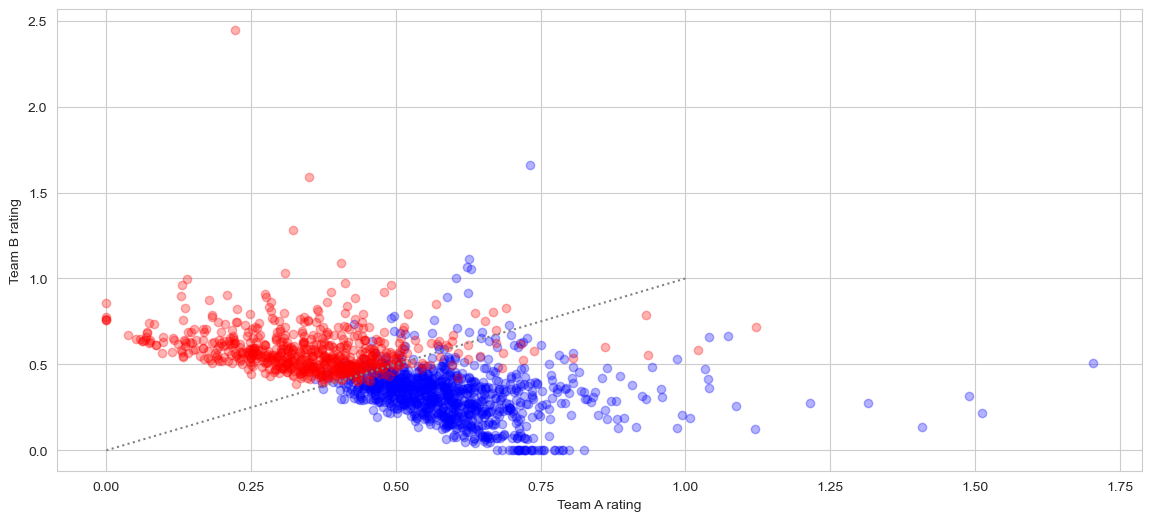

In [80]:
plt.figure(figsize=(14,6))
#plt.subplot(1, 2, 1)  # row 1, column 2, count 1

plt.scatter(
    final_rating_df[final_rating_df.Team_A_win == True].Team_A_rating,
    final_rating_df[final_rating_df.Team_A_win == True].Team_B_rating,
    c="blue",
    alpha=alpha,
    label = "A win"
)

plt.scatter(
    final_rating_df[final_rating_df.Team_A_win == False].Team_A_rating,
    final_rating_df[final_rating_df.Team_A_win == False].Team_B_rating,
    c="red",
    alpha=alpha,
    label= "B win"
)
plt.plot(range(0,2), range(0,2), linestyle="dotted", color="grey", label="A rating = B rating")
plt.xlabel("Team A rating")
plt.ylabel("Team B rating")

# using subplot function and creating plot two
# row 1, column 2, count 2
# plt.subplot(1, 2, 2)
 
# plt.scatter(
#     scaler.transform(final_rating_df[final_rating_df.Team_A_win == True].Team_A_rating.to_numpy().reshape(-1,1)),
#     scaler.transform(final_rating_df[final_rating_df.Team_A_win == True].Team_B_rating.to_numpy().reshape(-1,1)),
#     c="blue",
#     alpha=alpha,
#     label="A win"
# )

# plt.scatter(
#     scaler.transform(final_rating_df[final_rating_df.Team_A_win == False].Team_A_rating.to_numpy().reshape(-1,1)),
#     scaler.transform(final_rating_df[final_rating_df.Team_A_win == False].Team_B_rating.to_numpy().reshape(-1,1)),
#     c="red",
#     alpha=alpha,
#     label ="B win"
# )

# plt.plot(range(-4,5), range(-4,5), linestyle="dotted", color="grey", label="A rating = B rating")
# plt.legend(loc="upper center", bbox_to_anchor=(1.2, 1))

# plt.xlabel("Team A rating scaled")
# plt.ylabel("Team B rating scaled")
 
plt.show()

In [81]:
print("mean of team A win:", np.mean(final_rating_df.Team_A_win))
print("mean of team B win:", np.mean(final_rating_df.Team_B_win))

mean of team A win: 0.6055488540410132
mean of team B win: 0.3944511459589867


In [82]:
lr = LogisticRegression()
X = final_rating_df[["Team_A_rating", "Team_B_rating"]]
y = final_rating_df.Team_A_win.to_numpy().reshape(-1,1)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, stratify=y)

In [84]:
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
acc = accuracy_score(y_test, pred)
print("mean of true value:", np.mean(y_test))
print("mean of prediction:", np.mean(pred))
print("Accuracy:", acc)

mean of true value: 0.6048192771084338
mean of prediction: 0.6
Accuracy: 0.9180722891566265


c:\Users\parab\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


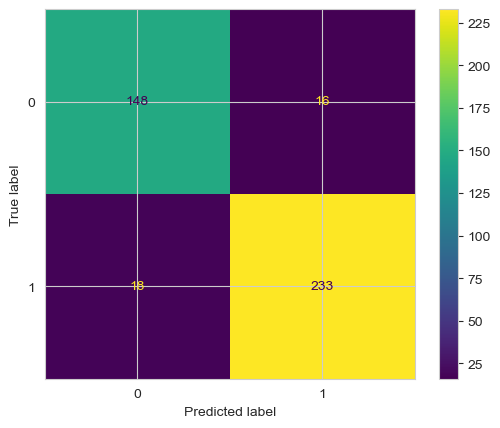

In [85]:
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Before chams 2022

In [86]:
chams_2022_team_rating = final_rating_df.loc[final_rating_df["Tournament"]=="Valorant Champions 2022"]

In [87]:
chams_2022_team_rating

,Tournament,Stage,Match Type,Match Name,Map,Team B,Team A,Team A Score,Team_A_win,Team B Score,Team_B_win,Team_A_rating,Team_B_rating
1599,Valorant Champions 2022,Group Stage,Decider (A),Paper Rex vs Team Liquid,Haven,Team Liquid,Paper Rex,13,False,15,True,0.513342,0.717446
1600,Valorant Champions 2022,Group Stage,Elimination (B),BOOM Esports vs ZETA DIVISION,Haven,ZETA DIVISION,BOOM Esports,13,True,11,False,0.471988,0.449045
1601,Valorant Champions 2022,Group Stage,Elimination (C),KRÜ Esports vs XERXIA Esports,Haven,XERXIA Esports,KRÜ Esports,7,False,13,True,0.420232,0.544222
1602,Valorant Champions 2022,Group Stage,Elimination (D),FURIA vs FNATIC,Haven,FNATIC,FURIA,11,False,13,True,0.356787,0.540071
1603,Valorant Champions 2022,Group Stage,Opening (A),Leviatán vs Team Liquid,Haven,Team Liquid,Leviatán,13,True,10,False,0.601477,0.458108
1604,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Haven,EDward Gaming,Paper Rex,13,True,8,False,0.582950,0.323253
1605,Valorant Champions 2022,Group Stage,Opening (D),DRX vs FURIA,Haven,FURIA,DRX,13,True,4,False,0.583467,0.373634
1606,Valorant Champions 2022,Group Stage,Opening (D),FNATIC vs 100 Thieves,Haven,100 Thieves,FNATIC,7,False,13,True,0.349249,0.463415
1607,Valorant Champions 2022,Group Stage,Winner's (A),Paper Rex vs Leviatán,Haven,Leviatán,Paper Rex,8,False,13,True,0.500467,0.538874
1608,Valorant Champions 2022,Playoffs,Grand Final,LOUD vs OpTic Gaming,Haven,OpTic Gaming,LOUD,13,True,5,False,0.656098,0.363654


In [88]:
lr2 = LogisticRegression()
W_train = final_rating_df[final_rating_df["Tournament"] != "Valorant Champions 2022"][["Team_A_rating", "Team_B_rating"]]
z_train = final_rating_df[final_rating_df["Tournament"] != "Valorant Champions 2022"].Team_A_win.to_numpy().reshape(-1,1)

W_test = chams_2022_team_rating[["Team_A_rating", "Team_B_rating"]]
z_test = chams_2022_team_rating.Team_A_win.to_numpy().reshape(-1,1)

In [89]:
print(len(W_train), len(W_test))

1642 16


In [90]:
lr2.fit(W_train, z_train)
pred2 = lr2.predict(W_test)
acc2 = accuracy_score(z_test, pred2)
print("mean of true values:", np.mean(z_test))
print("mean of prediction:", np.mean(pred2))
print("Accuracy:", acc2)

mean of true values: 0.4375
mean of prediction: 0.4375
Accuracy: 1.0


c:\Users\parab\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


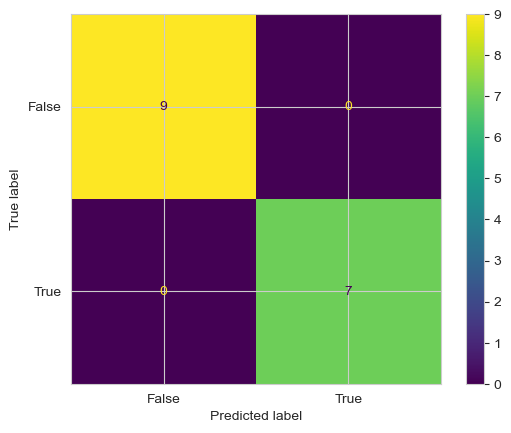

In [91]:
cm2 = confusion_matrix(z_test, pred2, labels=lr2.classes_)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2,
                              display_labels=lr2.classes_)
disp2.plot()
plt.show()

Overall Team Rating

In [92]:
grouped_overall_rating_df_A = Eco_rounds_ab_2022.groupby(['Team A'])["Rating_A"].agg("mean").reset_index()
grouped_overall_rating_df_B = Eco_rounds_ab_2022.groupby(['Team B'])["Rating_B"].agg("mean").reset_index()
#print(grouped_rating_df_A.head())
print(grouped_overall_rating_df_A.head(20))

              Team A  Rating_A
0              0Zero  0.709997
1        100 Thieves  0.443499
2          19esports  0.523145
3   1gameandwegohome  0.175775
4        3 Gün Yeter  0.629638
5        303 Esports  0.267860
6         3P eSports  0.710889
7    4 ruim e 1 ruim  0.476517
8          47 Gaming  0.422206
9          5 SAHABAT  0.462086
10            5MOKES  0.463022
11            5ORDIC  0.248196
12           9z Team  0.392825
13               ABC  0.583825
14              ADHD  0.435015
15          ARF TEAM  0.374864
16         ATS Brave  0.520187
17     AVALON Gaming  0.385469
18            AWARIA  0.620876
19               AWS  0.166667


In [93]:
chams_2022 =  maps_scores.loc[ (maps_scores["Tournament"]=="Valorant Champions 2022")]
len(chams_2022)

16

In [94]:
champs_rating_overall_df = chams_2022.merge(grouped_overall_rating_df_A, on=["Team A"], how="left")
champs_rating_overall_df

,Tournament,Stage,Match Type,Match Name,Map,Team A,Team A Score,Team_A_win,Team B,Team B Score,Team_B_win,Rating_A
0,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Haven,Paper Rex,13,True,EDward Gaming,8,False,0.601935
1,Valorant Champions 2022,Group Stage,Opening (A),Leviatán vs Team Liquid,Haven,Leviatán,13,True,Team Liquid,10,False,0.498799
2,Valorant Champions 2022,Group Stage,Winner's (A),Paper Rex vs Leviatán,Haven,Paper Rex,8,False,Leviatán,13,True,0.601935
3,Valorant Champions 2022,Group Stage,Opening (D),DRX vs FURIA,Haven,DRX,13,True,FURIA,4,False,0.557622
4,Valorant Champions 2022,Group Stage,Opening (D),FNATIC vs 100 Thieves,Haven,FNATIC,7,False,100 Thieves,13,True,0.432752
5,Valorant Champions 2022,Group Stage,Elimination (B),BOOM Esports vs ZETA DIVISION,Haven,BOOM Esports,13,True,ZETA DIVISION,11,False,0.498333
6,Valorant Champions 2022,Group Stage,Elimination (C),KRÜ Esports vs XERXIA Esports,Haven,KRÜ Esports,7,False,XERXIA Esports,13,True,0.502066
7,Valorant Champions 2022,Group Stage,Elimination (D),FURIA vs FNATIC,Haven,FURIA,11,False,FNATIC,13,True,0.437987
8,Valorant Champions 2022,Group Stage,Decider (A),Paper Rex vs Team Liquid,Haven,Paper Rex,13,False,Team Liquid,15,True,0.601935
9,Valorant Champions 2022,Playoffs,Upper Quarterfinals,Leviatán vs LOUD,Haven,Leviatán,6,False,LOUD,13,True,0.498799


In [95]:
champs_rating_overall_df = champs_rating_overall_df.merge(grouped_overall_rating_df_B, on=["Team B"], how="left")
champs_rating_overall_df

,Tournament,Stage,Match Type,Match Name,Map,Team A,Team A Score,Team_A_win,Team B,Team B Score,Team_B_win,Rating_A,Rating_B
0,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Haven,Paper Rex,13,True,EDward Gaming,8,False,0.601935,0.323253
1,Valorant Champions 2022,Group Stage,Opening (A),Leviatán vs Team Liquid,Haven,Leviatán,13,True,Team Liquid,10,False,0.498799,0.536515
2,Valorant Champions 2022,Group Stage,Winner's (A),Paper Rex vs Leviatán,Haven,Paper Rex,8,False,Leviatán,13,True,0.601935,0.522795
3,Valorant Champions 2022,Group Stage,Opening (D),DRX vs FURIA,Haven,DRX,13,True,FURIA,4,False,0.557622,0.448131
4,Valorant Champions 2022,Group Stage,Opening (D),FNATIC vs 100 Thieves,Haven,FNATIC,7,False,100 Thieves,13,True,0.432752,0.459975
5,Valorant Champions 2022,Group Stage,Elimination (B),BOOM Esports vs ZETA DIVISION,Haven,BOOM Esports,13,True,ZETA DIVISION,11,False,0.498333,0.445300
6,Valorant Champions 2022,Group Stage,Elimination (C),KRÜ Esports vs XERXIA Esports,Haven,KRÜ Esports,7,False,XERXIA Esports,13,True,0.502066,0.520376
7,Valorant Champions 2022,Group Stage,Elimination (D),FURIA vs FNATIC,Haven,FURIA,11,False,FNATIC,13,True,0.437987,0.512224
8,Valorant Champions 2022,Group Stage,Decider (A),Paper Rex vs Team Liquid,Haven,Paper Rex,13,False,Team Liquid,15,True,0.601935,0.536515
9,Valorant Champions 2022,Playoffs,Upper Quarterfinals,Leviatán vs LOUD,Haven,Leviatán,6,False,LOUD,13,True,0.498799,0.534523


In [96]:
champs_rating_overall_df=champs_rating_overall_df.rename(columns={"Rating_A":"Team_A_rating", "Rating_B":"Team_B_rating"})
champs_rating_overall_df

,Tournament,Stage,Match Type,Match Name,Map,Team A,Team A Score,Team_A_win,Team B,Team B Score,Team_B_win,Team_A_rating,Team_B_rating
0,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Haven,Paper Rex,13,True,EDward Gaming,8,False,0.601935,0.323253
1,Valorant Champions 2022,Group Stage,Opening (A),Leviatán vs Team Liquid,Haven,Leviatán,13,True,Team Liquid,10,False,0.498799,0.536515
2,Valorant Champions 2022,Group Stage,Winner's (A),Paper Rex vs Leviatán,Haven,Paper Rex,8,False,Leviatán,13,True,0.601935,0.522795
3,Valorant Champions 2022,Group Stage,Opening (D),DRX vs FURIA,Haven,DRX,13,True,FURIA,4,False,0.557622,0.448131
4,Valorant Champions 2022,Group Stage,Opening (D),FNATIC vs 100 Thieves,Haven,FNATIC,7,False,100 Thieves,13,True,0.432752,0.459975
5,Valorant Champions 2022,Group Stage,Elimination (B),BOOM Esports vs ZETA DIVISION,Haven,BOOM Esports,13,True,ZETA DIVISION,11,False,0.498333,0.445300
6,Valorant Champions 2022,Group Stage,Elimination (C),KRÜ Esports vs XERXIA Esports,Haven,KRÜ Esports,7,False,XERXIA Esports,13,True,0.502066,0.520376
7,Valorant Champions 2022,Group Stage,Elimination (D),FURIA vs FNATIC,Haven,FURIA,11,False,FNATIC,13,True,0.437987,0.512224
8,Valorant Champions 2022,Group Stage,Decider (A),Paper Rex vs Team Liquid,Haven,Paper Rex,13,False,Team Liquid,15,True,0.601935,0.536515
9,Valorant Champions 2022,Playoffs,Upper Quarterfinals,Leviatán vs LOUD,Haven,Leviatán,6,False,LOUD,13,True,0.498799,0.534523


In [97]:
lr3 = LogisticRegression()
A_train = final_rating_df[final_rating_df["Tournament"] != "Valorant Champions 2022"][["Team_A_rating", "Team_B_rating"]]
b_train = final_rating_df[final_rating_df["Tournament"] != "Valorant Champions 2022"].Team_A_win.to_numpy().reshape(-1,1)

A_test = champs_rating_overall_df[["Team_A_rating", "Team_B_rating"]]
b_test = champs_rating_overall_df.Team_A_win.to_numpy().reshape(-1,1)

In [98]:
print(len(A_train), len(b_test))

1642 16


In [99]:
lr3.fit(A_train, b_train)
pred3 = lr3.predict(A_test)
acc3 = accuracy_score(b_test, pred3)
print("mean of true values:", np.mean(b_test))
print("mean of prediction:", np.mean(pred3))
print("Accuracy:", acc3)

mean of true values: 0.4375
mean of prediction: 0.625
Accuracy: 0.5625


c:\Users\parab\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


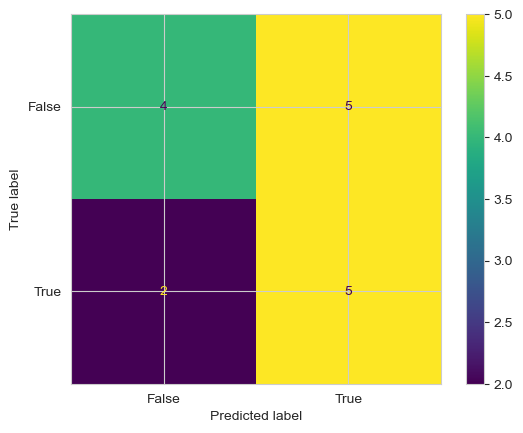

In [100]:
cm3 = confusion_matrix(b_test, pred3, labels=lr3.classes_)
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3,
                              display_labels=lr3.classes_)
disp3.plot()
plt.show()